In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2010-1-1', end='2020-1-1')['Adj Close']

In [6]:
log_returns = np.log(1 + data.pct_change())

In [7]:
# Taxa livre de risco
r = 0.025

In [9]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.147378
dtype: float64

In [10]:
type(stdev)

pandas.core.series.Series

In [11]:
# Convertendo para array numpy
stdev = stdev.values
stdev

array([0.14737813])

In [13]:
# T = Tempo
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [15]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [16]:
# Criando uma matriz completa de preço de ações
for t in range(1, t_intervals + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [17]:
S

array([[121.88954926, 121.88954926, 121.88954926, ..., 121.88954926,
        121.88954926, 121.88954926],
       [120.42032998, 121.78675282, 120.58982129, ..., 122.03132165,
        119.88288884, 123.37071942],
       [121.25136709, 122.63573676, 124.04671185, ..., 118.98386153,
        119.42820414, 122.07295959],
       ...,
       [125.88454927, 110.08425917, 142.46020495, ..., 115.1085209 ,
        118.07367157, 142.01466142],
       [126.70461273, 111.40370087, 141.59696924, ..., 115.28811568,
        118.40746073, 139.72006655],
       [129.00712249, 110.90072379, 141.81438298, ..., 116.77428217,
        118.04491743, 143.08883276]])

In [19]:
S.shape

(251, 10000)

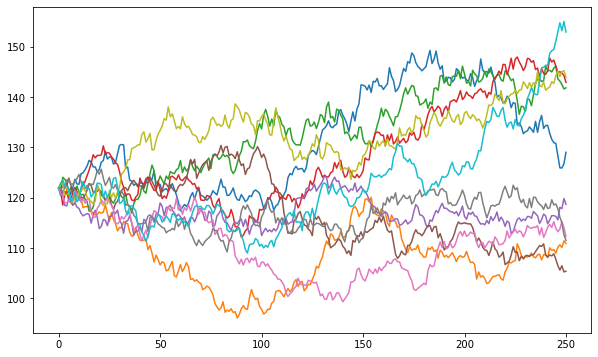

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [21]:
# Criando array que contém 0s ou números iguais as diferenças (p = payoff)
p = np.maximum(S[-1] - 110, 0)
p

array([19.00712249,  0.90072379, 31.81438298, ...,  6.77428217,
        8.04491743, 33.08883276])

In [22]:
p.shape

(10000,)

In [23]:
# Preço da opção de compra
C = np.exp(-r * T) * np.sum(p) / iterations
C

16.594852636106047